In [2]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit import IBMQ
from qiskit import transpile
import numpy as np
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import AerSimulator
import numpy as np
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import noise
from qiskit.utils.mitigation import CompleteMeasFitter, complete_meas_cal
# from qiskit_experiments.library import StateTomography
from qiskit.visualization import array_to_latex

In [3]:
from qiskit import Aer
aer_sim = Aer.get_backend('aer_simulator')

In [4]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
manila_real = provider.get_backend('ibmq_manila')

In [9]:
manila_sim = AerSimulator.from_backend(manila_real)
manila_real.configuration().supported_features[0][0]

'q'

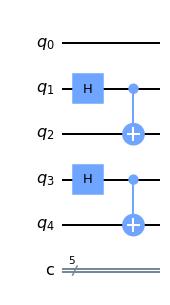

In [5]:
initial_epr = QuantumCircuit(5, 5)

#Hadmard gate on 
initial_epr.h(1)
# #cnot gate on 0 and 1
initial_epr.cx(1, 2)
# initial_epr.z(2)
# #Hadmard gate on 
initial_epr.h(3)
# #cnot gate on 0 and 1
initial_epr.cx(3, 4)
# initial_epr.z(4)
#draw the circuit
# initial_epr.h(0)
# initial_epr.cx(0, 3)
initial_epr.draw('mpl')

In [6]:
bell_state_measurement = QuantumCircuit(5, 5)

#CNOT gate on 1 and 2
bell_state_measurement.cx(2, 3)
#Hadamard on 1
bell_state_measurement.h(2)
#barrier to seperate measurement
bell_state_measurement.barrier((2, 3))
#add z measurement
bell_state_measurement.measure((2 , 3), (2, 3))
# bell_state_measurement.x(4).c_if(3, 1)
# bell_state_measurement.z(4).c_if(2, 1)
bell_state_measurement.cx(3, 4)
bell_state_measurement.cz(2, 4)
#add barrier so BSM happens before CHSH
bell_state_measurement.barrier(range(5))
#bell_state_measurement.draw('mpl')

In [7]:
chsh3test = []

rotate_az_cDzx = QuantumCircuit(5, 5)
rotate_az_cDzx.ry(-np.pi/4, 4)
chsh3test.append(rotate_az_cDzx)

rotate_az_cEzx = QuantumCircuit(5, 5)
rotate_az_cEzx.ry(np.pi/4, 4)
chsh3test.append(rotate_az_cEzx)

rotate_ax_cDzx = QuantumCircuit(5, 5)
rotate_ax_cDzx.ry(-np.pi/2, 1)
rotate_ax_cDzx.ry(-np.pi/4, 4)
chsh3test.append(rotate_ax_cDzx)

rotate_ax_cEzx = QuantumCircuit(5, 5)
rotate_ax_cEzx.ry(-np.pi/2, 1)
rotate_ax_cEzx.ry(np.pi/4, 4)
chsh3test.append(rotate_ax_cEzx)


rotate_az_cDzy = QuantumCircuit(5, 5)
rotate_az_cDzy.rx(np.pi/4, 4)
chsh3test.append(rotate_az_cDzy)

rotate_az_cEzy = QuantumCircuit(5, 5)
rotate_az_cEzy.rx(-np.pi/4, 4)
chsh3test.append(rotate_az_cEzy)

rotate_ay_cDzy = QuantumCircuit(5, 5)
rotate_ay_cDzy.rx(np.pi/2, 1)
rotate_ay_cDzy.rx(np.pi/4, 4)
chsh3test.append(rotate_ay_cDzy)

rotate_ay_cEzy = QuantumCircuit(5, 5)
rotate_ay_cEzy.rx(np.pi/2, 1)
rotate_ay_cEzy.rx(-np.pi/4, 4)
chsh3test.append(rotate_ay_cEzy)


rotate_ax_cDxy = QuantumCircuit(5, 5)
rotate_ax_cDxy.ry(-np.pi/2, 1)
rotate_ax_cDxy.rz(-np.pi/4, 4)
rotate_ax_cDxy.ry(-np.pi/2, 4)
chsh3test.append(rotate_ax_cDxy)

rotate_ax_cExy = QuantumCircuit(5, 5)
rotate_ax_cExy.ry(-np.pi/2, 1)
rotate_ax_cExy.rz(np.pi/4, 4)
rotate_ax_cExy.ry(-np.pi/2, 4)
chsh3test.append(rotate_ax_cExy)

rotate_ay_cDxy = QuantumCircuit(5, 5)
rotate_ay_cDxy.rx(np.pi/2, 1)
rotate_ay_cDxy.rz(-np.pi/4, 4)
rotate_ay_cDxy.ry(-np.pi/2, 4)
chsh3test.append(rotate_ay_cDxy)

rotate_ay_cExy = QuantumCircuit(5, 5)
rotate_ay_cExy.rx(np.pi/2, 1)
rotate_ay_cExy.rz(np.pi/4, 4)
rotate_ay_cExy.ry(-np.pi/2, 4)
chsh3test.append(rotate_ay_cExy)

#chsh3test[3].draw('mpl')

In [8]:
meas = QuantumCircuit(5, 5)
meas.barrier(range(5))
#add z measurement
meas.measure((1, 4), (1, 4))

# meas.measure((1, 2), (1, 2))
#meas.draw()

# The Qiskit circuit object supports composition using
# the addition operator.
# print(meas.cregs[0])
# qc = circ.compose(meas)

#drawing the circuit
#qc.draw()

In [9]:
bsm2 = QuantumCircuit(5, 5)
#CNOT gate on 1 and 2
bsm2.cx(1, 4)
#Hadamard on 1
bsm2.h(1)
bsm2.barrier(range(5))

In [10]:
# No BSM just epr state with alice and charlie
epr_AC = QuantumCircuit(5, 5)
epr_AC.h(1)
# #cnot gate on 0 and 1
epr_AC.cx(1, 4)
epr_AC.barrier(range(5))

#epr_AC.draw('mpl')

In [11]:
#build circuits actual test
quantum_circuits = []
for rot in chsh3test:
#     circuit = QuantumCircuit(2, 2)
#     circuit.compose(initialize)
#     circuit.compose(rot)
#     circuit.compose(meas)
    circuit = initial_epr + bell_state_measurement +  rot + meas
    quantum_circuits.append(circuit)
    

<ipython-input-11-d5467efe9df8>:8: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = initial_epr + bell_state_measurement +  rot + meas


In [12]:
# build circuits no bsm
for rot in chsh3test:
    circuit = epr_AC + rot + meas
    quantum_circuits.append(circuit)

<ipython-input-12-0a4fa217edfa>:3: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = epr_AC + rot + meas


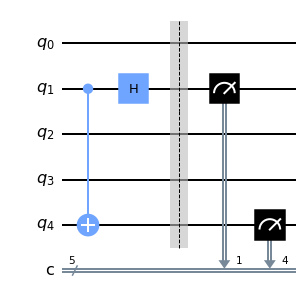

In [13]:
bell_state_measurement_AC = QuantumCircuit(5, 5)

#CNOT gate on 1 and 2
bell_state_measurement_AC.cx(1, 4)
#Hadamard on 1
bell_state_measurement_AC.h(1)
#barrier to seperate measurement
bell_state_measurement_AC.barrier(range(5))
#add z measurement
bell_state_measurement_AC.measure((1 , 4), (1, 4))
bell_state_measurement_AC.draw('mpl')

<ipython-input-14-91b98d033be6>:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = initial_epr + bell_state_measurement + bell_state_measurement_AC


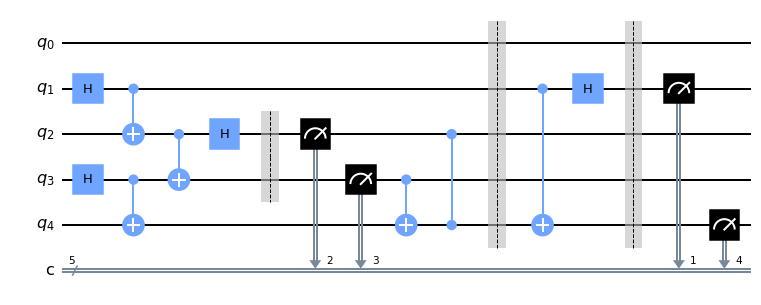

In [14]:
# build circuits bsm test epr pairs
circuit = initial_epr + bell_state_measurement + bell_state_measurement_AC
quantum_circuits.append(circuit)
circuit.draw('mpl')

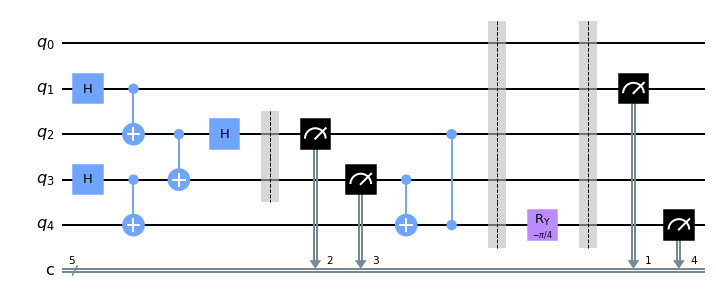

In [15]:
quantum_circuits[0].draw('mpl')

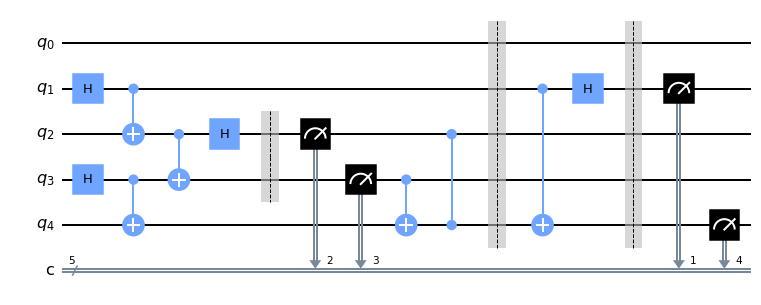

In [16]:
quantum_circuits[-1].draw('mpl')

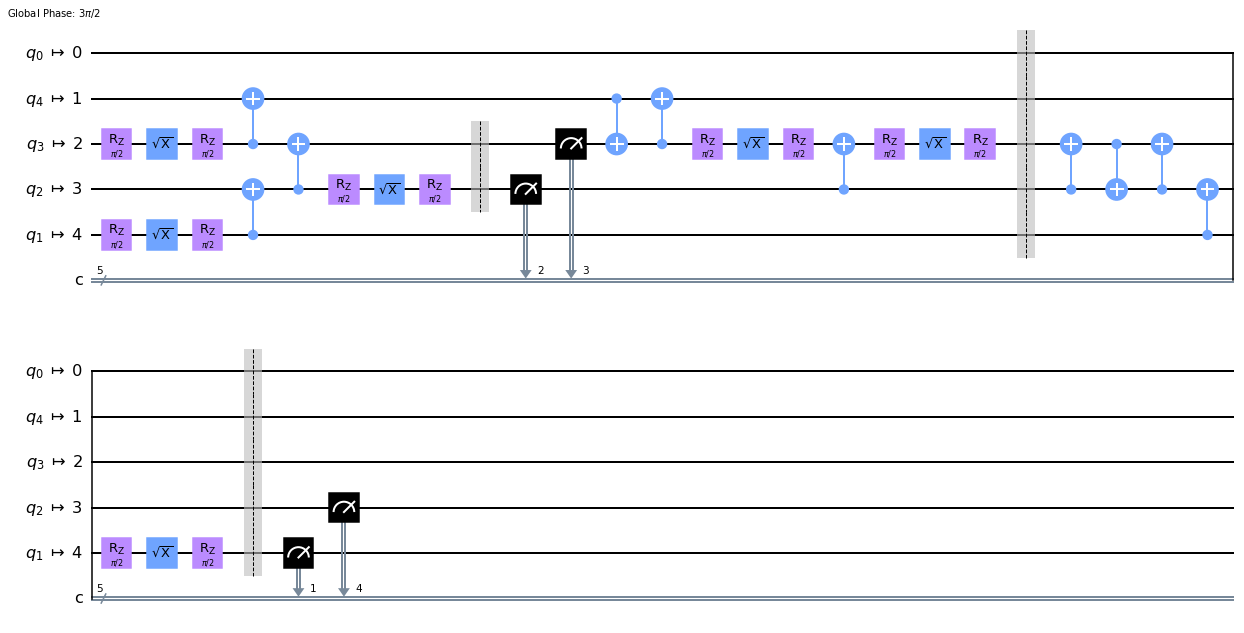

In [17]:
transpile(quantum_circuits, manila_real)[-1].draw('mpl')

In [18]:
import qiskit.quantum_info as qi

In [19]:
psi_AB = qi.Statevector.from_instruction(epr_AC.compose(chsh3test[2]))
psi_AB.draw('latex')

<IPython.core.display.Latex object>

In [20]:
# Use Aer's qasm_simulator

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
manila_sim_job = manila_sim.run(transpile(quantum_circuits, manila_real), shots=20000)
aer_sim_job = aer_sim.run(transpile(quantum_circuits, manila_real), shots=20000)

# manila_real_job = manila_real.run(transpile(quantum_circuits[-1], manila_real), shots=20000)
# job_monitor(manila_real_job)



manila_real_job = manila_real.retrieve_job("632099ddbf82615292009a0b") #uncomment for grabbing finished jobs

In [21]:
# Grab the results from the job.
aer_sim_result = aer_sim_job.result()
manila_sim_result = manila_sim_job.result()
manila_real_result = manila_real_job.result()

In [25]:
qr = QuantumRegister(5)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')
cal_results = manila_sim.run(transpile(meas_calibs, manila_real), shots=20000).result()

meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

<IPython.core.display.Latex object>

In [26]:
#Error Mitigation
#Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(manila_sim_result)
mitigated_counts = mitigated_results.get_counts()

In [27]:
def calc_chsh1(theta_dict):
    zz = theta_dict[0]
    zx = theta_dict[1]
    xz = theta_dict[3]
    xx = theta_dict[2]
    
    no_shots = sum(xx[y] for y in xx)

    chsh1 = 0
    chsh2 = 0
    heads = 0

    for element in zz:
#         print(element)
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*zz[element]
        
    for element in zx:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*zx[element]

    for element in xz:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1-= parity*xz[element]

    for element in xx:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*xx[element]
    
    return chsh1 / no_shots, heads

In [28]:

def calc_chsh23(theta_dict):
    zz = theta_dict[0]
    zx = theta_dict[1]
    xz = theta_dict[2]
    xx = theta_dict[3]
    
    no_shots = sum(xx[y] for y in xx)

    chsh1 = 0
    chsh2 = 0
    heads = 0

    for element in zz:
#         print(element)
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*zz[element]

    for element in zx:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*zx[element]

    for element in xz:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1-= parity*xz[element]

    for element in xx:
        parity = (-1)**(int(element[0])+int(element[3]))
        chsh1+= parity*xx[element]
    
    return chsh1 / no_shots, heads

In [29]:
def prob_epr_pairs(circuit_counts):
    no_shots = sum(circuit_counts[outcome] for outcome in circuit_counts)
    
    zz = 0
    zo = 0
    oz = 0
    oo = 0
    
    for element in circuit_counts:
        if int(element[0]) == 0 and int(element[3]) == 0:
            zz += circuit_counts[element]
            
        if int(element[0]) == 0 and int(element[3]) == 1:
            zo += circuit_counts[element]
            
        if int(element[0]) == 1 and int(element[3]) == 0:
            oz += circuit_counts[element]
            
        if int(element[0]) == 1 and int(element[3]) == 1:
            oo += circuit_counts[element]
            
    return np.array([zz, zo, oz, oo]) / no_shots

In [30]:
def get_chsh3(circuit_counts):
    chsh23 = calc_chsh23(circuit_counts[8:12])[0] + calc_chsh23(circuit_counts[4:8])[0]
    chsh1 = calc_chsh1(circuit_counts[0:4])[0]
    return chsh23 + chsh1

In [42]:
print(manila_real_result.get_counts())

{'00000': 1896, '10000': 531, '10010': 503, '10100': 461, '10110': 473, '11000': 561, '11010': 528, '11100': 475, '11110': 490, '00010': 2195, '00100': 2145, '00110': 1917, '01000': 2145, '01010': 1784, '01100': 1397, '01110': 2499}


In [43]:
manila_sim_job_bsm = manila_sim.run(transpile(quantum_circuits[-1], manila_real), shots=20000)
manila_sim_result_bsm = manila_sim_job_bsm.result()

In [46]:
print("Mixed State probabilities Manila Real")
prob = prob_epr_pairs(manila_sim_result.get_counts()[-1])
print(f"zz: {prob[0]}")
print(f"zo: {prob[1]}")
print(f"oz: {prob[2]}")
print(f"oo: {prob[3]}")

Mixed State probabilities Manila Real
zz: 0.86415
zo: 0.09955
oz: 0.0238
oo: 0.0125


In [34]:
print("Complex Bell Test")
print("Manila Real Results:")
print(get_chsh3(manila_real_result[0:12]))
print("Manila Sim Results:")
print(get_chsh3(manila_sim_result.get_counts()[0:12]))
print("Manila Sim Mitigated Results:")
print(get_chsh3(mitigated_results.get_counts()[0:12]))
print("Aer Sim Results:")
print(get_chsh3(aer_sim_result.get_counts()[0:12]))
print("Quantum Theoretical:")
print(6*np.sqrt(2))

Complex Bell Test
Manila Real Results:


TypeError: 'Result' object is not subscriptable

In [39]:
print("Complex Bell Test No Swap")
print("Manila Real Results:")
print(get_chsh3(manila_real_result.get_counts()[12:24]))
print("Manila Sim Results:")
print(get_chsh3(manila_sim_result.get_counts()[12:24]))
print("Manila Sim Mitigated Results:")
print(get_chsh3(mitigated_results.get_counts()[12:24]))
print("Aer Sim Results:")
print(get_chsh3(aer_sim_result.get_counts()[12:24]))
print("Quantum Theoretical:")
print(6*np.sqrt(2))

Complex Bell Test No Swap
Manila Real Results:


TypeError: unhashable type: 'slice'

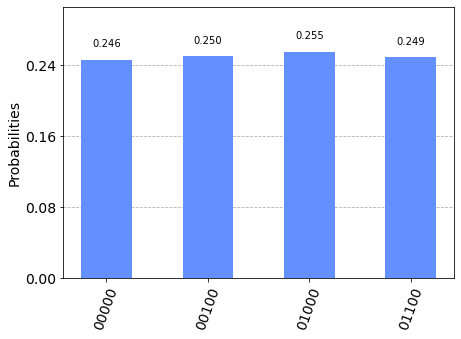

In [36]:
plot_histogram(aer_sim_result.get_counts()[-1])

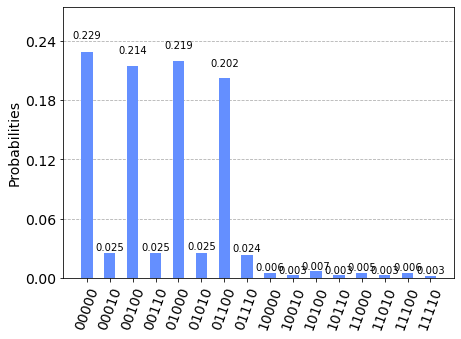

In [37]:
plot_histogram(manila_sim_result.get_counts()[-1])

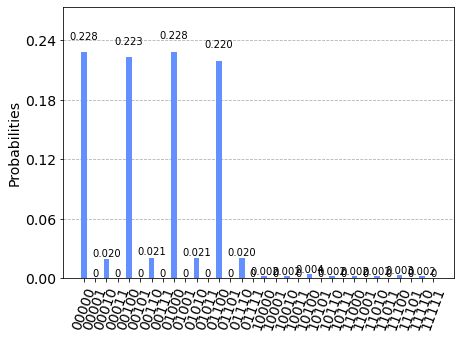

In [38]:
plot_histogram(mitigated_results.get_counts()[-1])